In [37]:
x_train = [] 
x_test = []
y_train = []
y_test = [] 
l = 20#length of train data

In [38]:
for i in range(1,l+1):
    x_train.append(4*(i-1)/(l-1)-2)
for i in range(1, l):
    x_test.append(4*(i-0.5)/(l-1)-2)
for i in x_train:
    y_train.append(1/(1+25*i*i))
for i in x_test:
    y_test.append(1/(1+25*i*i))

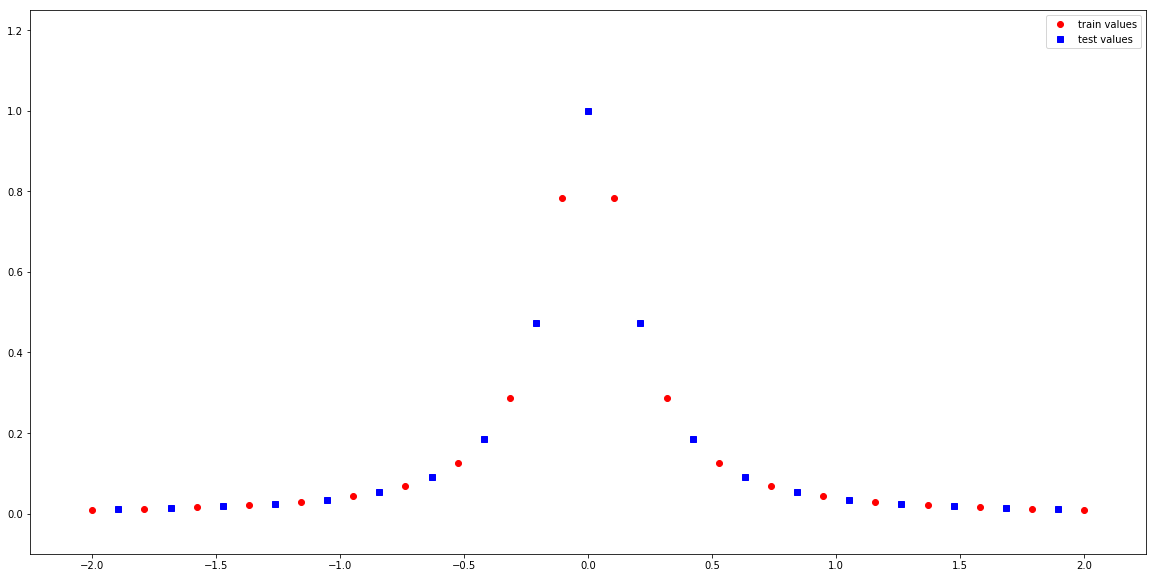

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bs')
plt.gca().legend(('train values','test values'))
plt.axis([-2.25, 2.25, -.1, 1.25])
plt.show()

# Error function

In [40]:
import numpy as np
def squared_error(y_true, predictions):
    y_true = np.array(y_true)
    predictions = np.array(predictions)
    mse = np.mean((y_true - predictions)**2)
    return mse

# Lagrange Interpolation polynomial

Error: 57.60759940655038


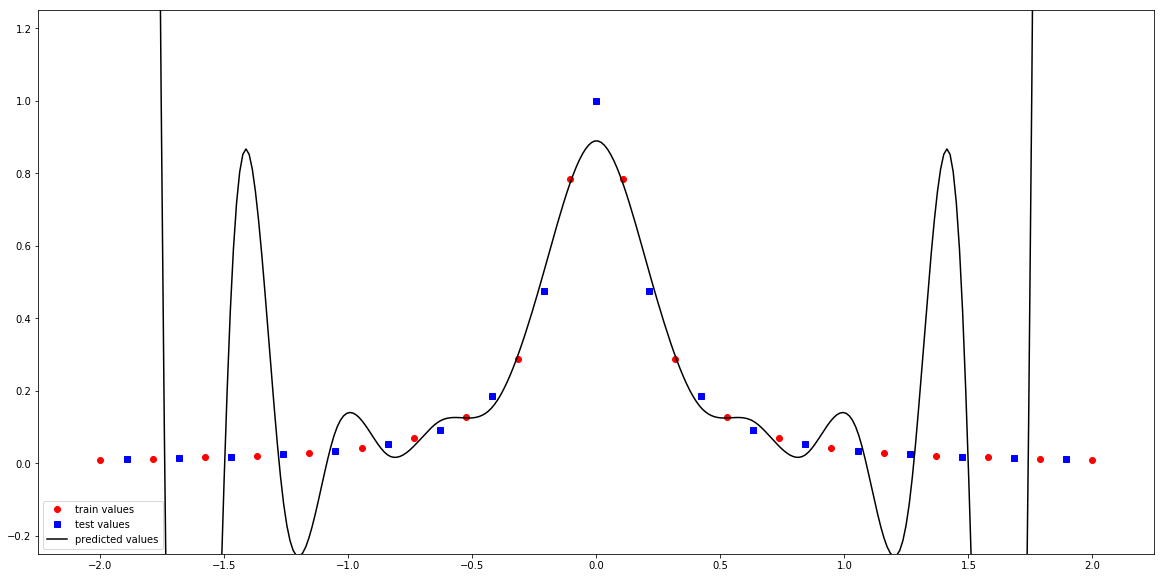

In [41]:
def Lagrange(points, x):
    sum = 0
    n = len(points)
    for i in range(n): # sum of n elements
        xi, yi = points[i]
        def L(i):
            Lvalue = 1
            for j in range(n):
                if i == j: continue # i != j
                xj, yj = points[j]
                Lvalue *= (x-xj)/(xi-xj) 
            return Lvalue
        sum += yi*L(i)
    return sum
data = np.column_stack((x_train, y_train))
predictions = []
for i in x_test:
    predictions.append(Lagrange(data, i))
print("Error: {}".format(squared_error(y_test, predictions)))

from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(min(x_test),max(x_test), 300)
spl = make_interp_spline(x_test, predictions, k=3) #BSpline object
power_smooth = spl(xnew)

plt.figure(figsize=(20,10))
plt.plot(x_train, y_train, 'ro') # train values
plt.plot(x_test, y_test, 'bs') # test values
plt.plot(xnew, power_smooth, 'k-') # test values
plt.gca().legend(('train values','test values', 'predicted values'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

# Normal Equation

Top rows of X : [[ 1.         -2.        ]
 [ 1.         -1.78947368]
 [ 1.         -1.57894737]
 [ 1.         -1.36842105]
 [ 1.         -1.15789474]]
Fitted params: [ 1.39473904e-01 -5.20417043e-18]
Error: 0.05950826290303254


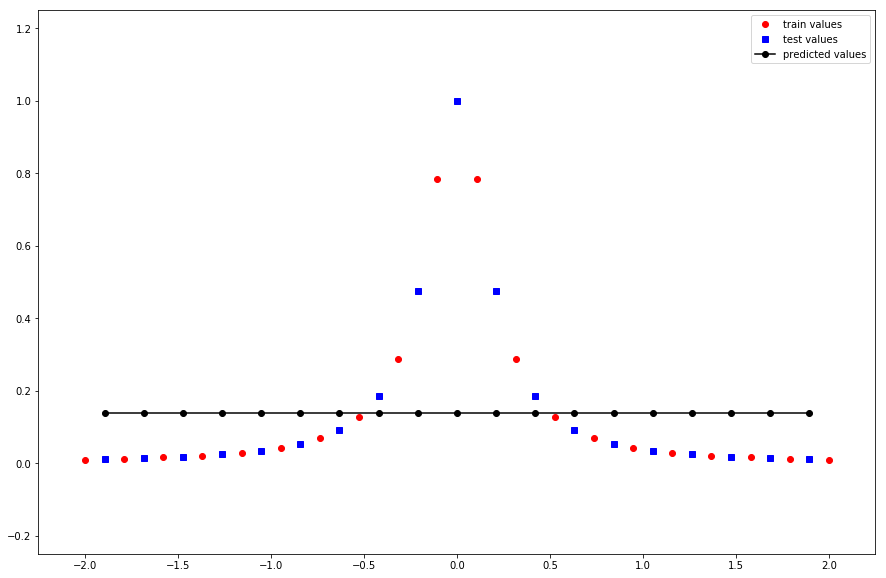

In [42]:
# add column of ones to the first position
X = np.array([np.ones(len(x_train)), x_train]).T
print('Top rows of X : {}'.format(X[:5, :]))
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_train)  # w = (x.T * x)**(-1) * x.T * y
print('Fitted params: {}'.format(w))
X_test = np.array([np.ones(len(x_test)), x_test]).T
predictions = np.dot(w, X_test.T) # prediction = weights * X
print("Error: {}".format(squared_error(y_test, predictions)))

plt.figure(figsize=(15,10))
plt.plot(x_train, y_train, 'ro') # train values
plt.plot(x_test, y_test, 'bs') # test values
plt.plot(x_test, predictions, 'ko-') # test values
plt.gca().legend(('train values','test values', 'predicted values'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

# Least-square method 

Fitted params: m- 7.747708724581419e-18, c- 0.1394739033227645
Error: 0.05950826290700097


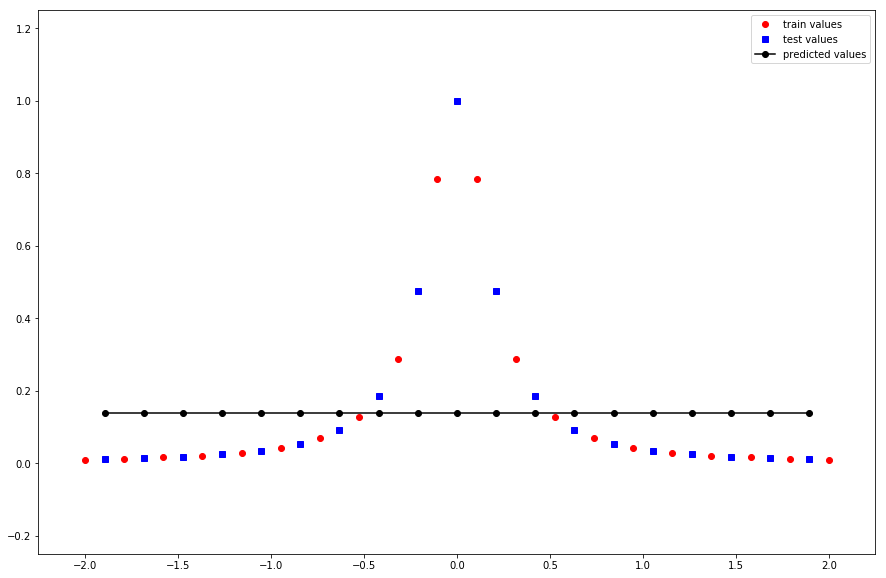

In [43]:
# First order
# Building the model
m = 0
c = 0
L = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
n = float(len(X)) # Number of elements in X
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*np.array(x_train) + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x_train * (y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
print('Fitted params: m- {}, c- {}'.format(m, c))
predictions = m*np.array(x_test) + c
print("Error: {}".format(squared_error(y_test, predictions)))

plt.figure(figsize=(15,10))
plt.plot(x_train, y_train, 'ro') # train values
plt.plot(x_test, y_test, 'bs') # test values
plt.plot(x_test, predictions, 'ko-') # test values
plt.gca().legend(('train values','test values', 'predicted values'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

# Regression with Sklearn

Fitted params: m- [1.52278498e-18], c- 0.1394739035574945
Error: 0.05950826290303254


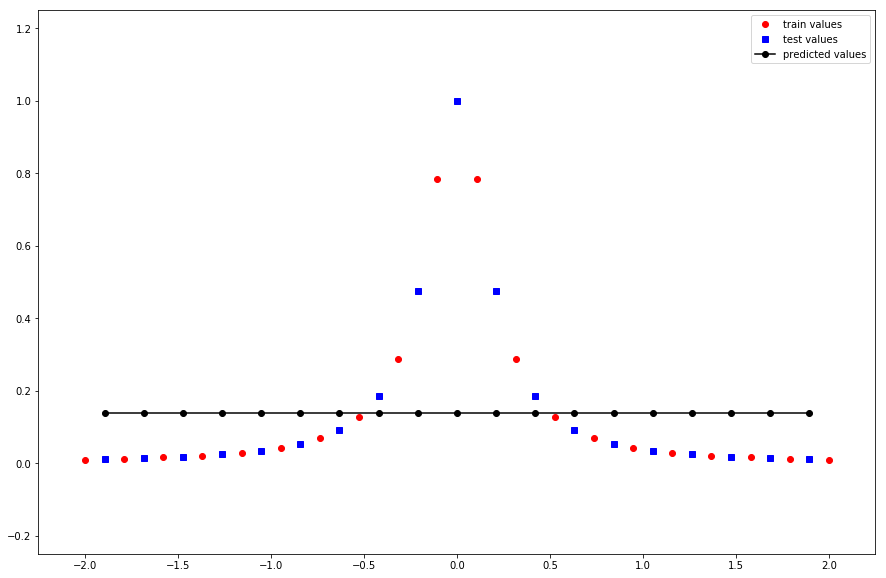

In [44]:
# Linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.reshape(x_train, (-1,1)), y_train)
print('Fitted params: m- {}, c- {}'.format(reg.coef_, reg.intercept_))
predictions_l = reg.predict(np.reshape(x_test, (-1,1)))
print("Error: {}".format(squared_error(y_test, predictions_l)))

plt.figure(figsize=(15,10))
plt.plot(x_train, y_train, 'ro') # train values
plt.plot(x_test, y_test, 'bs') # test values
plt.plot(x_test, predictions_l, 'ko-') # test values
plt.gca().legend(('train values','test values', 'predicted values'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

Fitted params: m- [ 0.00000000e+00  1.28296047e-18 -9.92380510e-02], c- 0.2857194524683784
Error: 0.041010117129616275


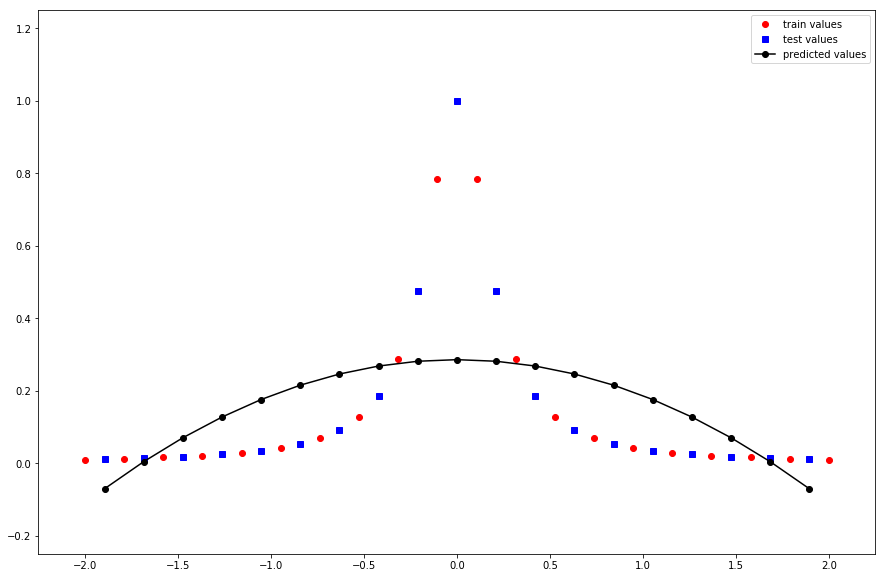

In [45]:
# Quadratic 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(np.reshape(x_train, (-1,1)))
x_test_poly = poly_features.fit_transform(np.reshape(x_test, (-1,1)))
reg = LinearRegression().fit(x_train_poly, y_train)
print('Fitted params: m- {}, c- {}'.format(reg.coef_, reg.intercept_))
predicitons_q = reg.predict(x_test_poly)
print("Error: {}".format(squared_error(y_test, predicitons_q)))

plt.figure(figsize=(15,10))
plt.plot(x_train, y_train, 'ro') # train values
plt.plot(x_test, y_test, 'bs') # test values
plt.plot(x_test, predicitons_q, 'ko-') # test values
plt.gca().legend(('train values','test values', 'predicted values'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

Fitted params: m- [ 0.00000000e+00 -2.95765526e-15 -8.99556540e-01  2.55402634e-15
  4.35436310e-01 -5.29856060e-16 -6.10944268e-02], c- 0.5152964695902782
Error: 0.01983430515632457


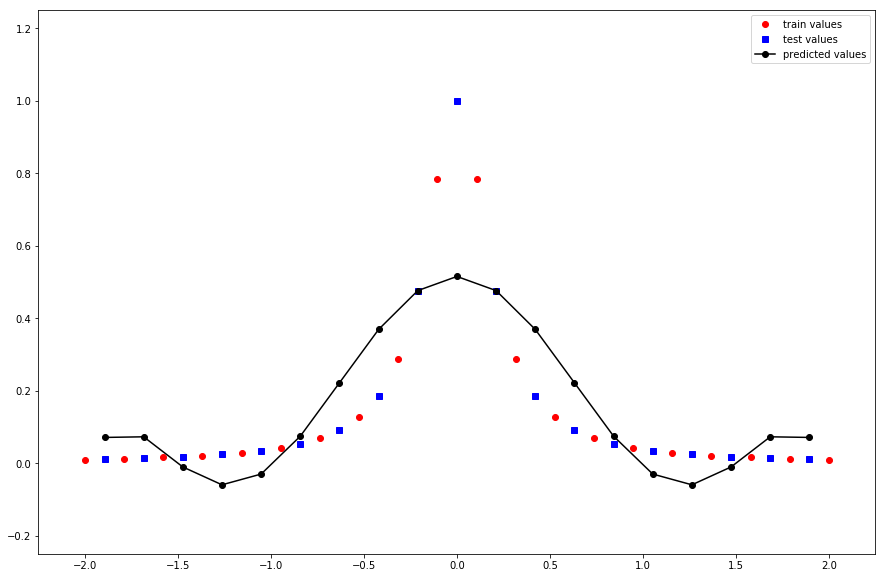

In [46]:
# Cubic
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(np.reshape(x_train, (-1,1)))
x_test_poly = poly_features.fit_transform(np.reshape(x_test, (-1,1)))
reg = LinearRegression().fit(x_train_poly, y_train)
print('Fitted params: m- {}, c- {}'.format(reg.coef_, reg.intercept_))
predictions_c = reg.predict(x_test_poly)
print("Error: {}".format(squared_error(y_test, predictions_c)))

plt.figure(figsize=(15,10))
plt.plot(x_train, y_train, 'ro') # train values
plt.plot(x_test, y_test, 'bs') # test values
plt.plot(x_test, predictions_c, 'ko-') # test values
plt.gca().legend(('train values','test values', 'predicted values'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

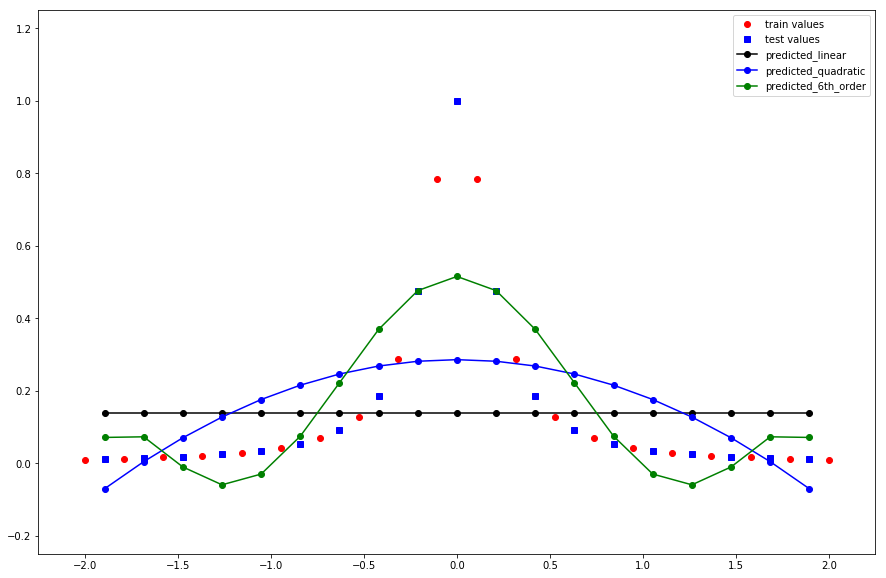

In [47]:
plt.figure(figsize=(15,10))
plt.plot(x_train, y_train, 'ro') # train values
plt.plot(x_test, y_test, 'bs') # test values
plt.plot(x_test, predictions_l, 'ko-') # test values predicted linear
plt.plot(x_test, predicitons_q, 'bo-') # test values predicted quadratic
plt.plot(x_test, predictions_c, 'go-') # test values predicted 6th order
plt.gca().legend(('train values','test values', 'predicted_linear', 'predicted_quadratic', 'predicted_6th_order'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

# Spline Interpolation

Error: 0.002915734644854962


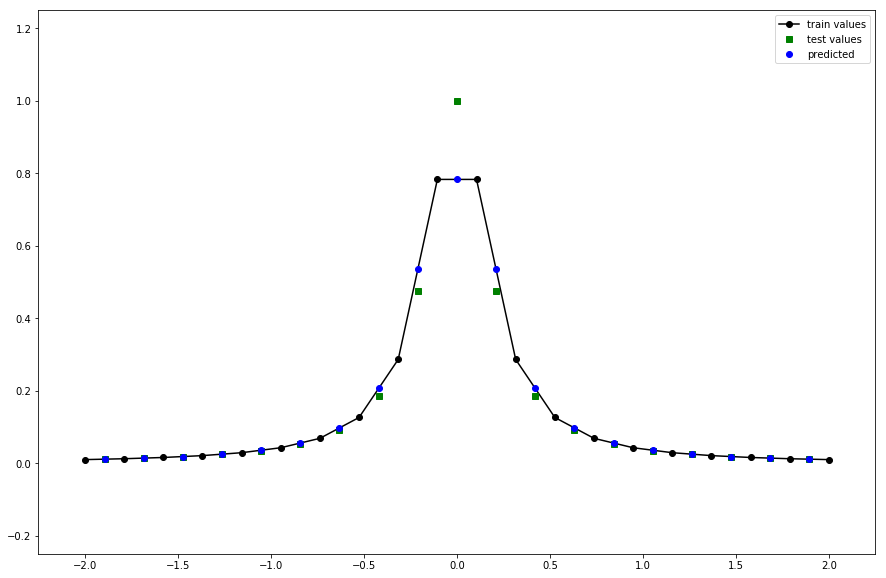

In [54]:
def getNeighbours(x,y, elem):
    if elem <= x[0]:
        return [(x[0],y[0]),(x[1],y[1])]
    if elem >= x[len(x)-1]:
        return [(x[len(x)-1], y[len(y)-1]),(x[len(x)-2],y[len(y)-2])]
    else:
        for i in range(len(x)):
            if elem <= x[i]:
                return [(x[i-1],y[i-1]),(x[i],y[i])]

def calcY(x,y,el):
    x1 = getNeighbours(x,y,el)[0][0]
    x2 = getNeighbours(x,y,el)[1][0]
    y1 = getNeighbours(x,y,el)[0][1]
    y2 = getNeighbours(x,y,el)[1][1]
    return y1 + (y2-y1)*(el-x1)/(x2-x1)

def func(x,y,xk):
    arr = []
    for i in range(len(xk)):
        arr.append(calcY(x,y,xk[i]))
    return arr

prediction = func(x_train,y_train,x_test)
print("Error: {}".format(squared_error(y_test, prediction)))
plt.figure(figsize=(15,10))
plt.plot(x_train,y_train,'ko-') # train
plt.plot(x_test, y_test,'gs' ) # test
plt.plot(x_test, prediction, 'bo') # predicted
plt.gca().legend(('train values','test values', 'predicted'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()

Error: 0.0012775206114902682


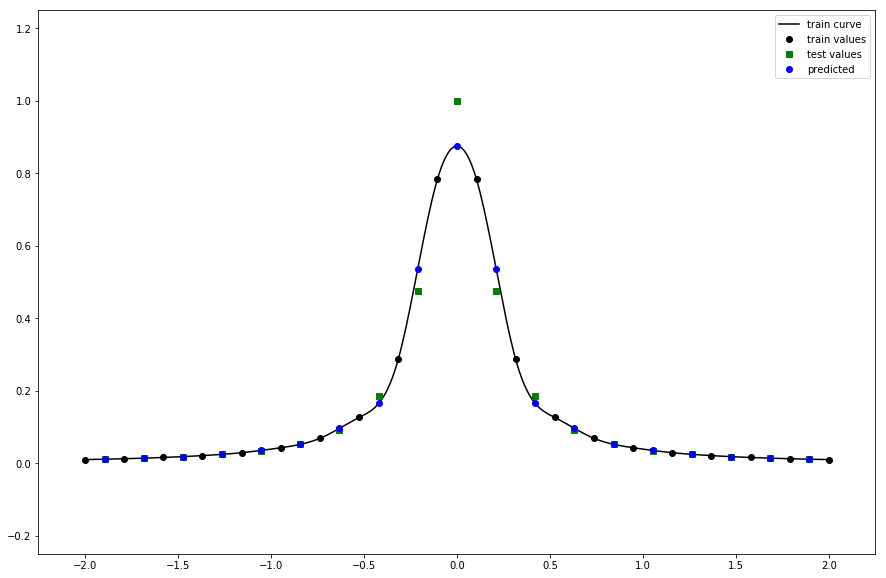

In [86]:
from scipy.interpolate import interp1d
f2 = interp1d(x_train, y_train, kind='cubic')

from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(min(x_train),max(x_train), 400)
spl = make_interp_spline(x_train, f2(x_train), k=3) #BSpline object
power_smooth = spl(xnew)

xnew_test = np.linspace(min(x_test),max(x_test), l-1)
spl = make_interp_spline(x_test, f2(x_test), k=3) #BSpline object
power_smooth_test = spl(xnew_test)
print("Error: {}".format(squared_error(y_test, power_smooth_test)))

plt.figure(figsize=(15,10))
plt.plot(xnew, power_smooth, 'k-') # cubic spline
plt.plot(x_train, y_train, 'ko') # train
plt.plot(x_test, y_test,'gs') # test
plt.plot(xnew_test, power_smooth_test, 'bo')
plt.gca().legend(('train curve','train values', 'test values', 'predicted'))
plt.axis([-2.25, 2.25, -0.25, 1.25])
plt.show()